In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

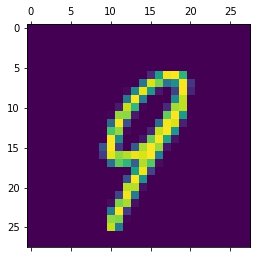

In [ ]:
plt.matshow(X_train[22])

In [ ]:
Y_train[22]

9

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train_flatten = X_train.reshape(len(X_train),28*28)

In [ ]:
X_train_flatten.shape

(60000, 784)

In [ ]:
X_test_flatten = X_test.reshape(len(X_test),28*28)
X_test_flatten.shape

(10000, 784)

In [ ]:
# a neural network 
model = keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']

              )
model.fit(X_train_flatten,Y_train,epochs = 7)
#epochs is the number of times the model is going to be trained

Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4686 - accuracy: 0.8770
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9152
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9209
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9255
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9275
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2589 - accuracy: 0.9281


In [ ]:
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 0s 912us/step - loss: 0.2631 - accuracy: 0.9278


[0.26307404041290283, 0.9277999997138977]

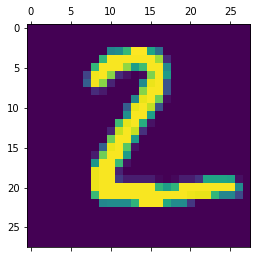

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted = model.predict(X_test_flatten)

In [ ]:
y_predicted[1]

array([4.1850120e-01, 1.2525201e-02, 9.9951911e-01, 2.9549584e-01,
       9.1107726e-11, 9.1013348e-01, 9.2396820e-01, 5.5631162e-14,
       2.1375012e-01, 9.8970471e-11], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
# Confusion Matirx 
cm = tf.math.confusion_matrix(labels = Y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    4,    6,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,   11,  930,   15,    6,    3,   12,   10,   37,    4],
       [   4,    0,   19,  920,    0,   25,    2,   11,   22,    7],
       [   1,    1,    5,    2,  903,    0,   11,    5,   12,   42],
       [   9,    3,    1,   31,    7,  777,   15,    9,   34,    6],
       [  10,    3,    6,    1,    7,   12,  914,    2,    3,    0],
       [   1,    7,   23,    7,    2,    1,    0,  958,    3,   26],
       [   5,    9,    6,   21,    8,   19,   10,   13,  878,    5],
       [   9,    7,    1,   10,   18,    5,    0,   27,   10,  922]],
      dtype=int32)>

In [ ]:
model = keras.Sequential([
                 keras.layers.Flatten(input_shape = (28,28)),
                 keras.layers.Dense(1000,activation = 'relu'),
                 keras.layers.Dense(10,activation = 'sigmoid')

])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']

              )
model.fit(X_train,Y_train,epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1845 - accuracy: 0.9448
Epoch 2/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0738 - accuracy: 0.9775
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0481 - accuracy: 0.9850
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0332 - accuracy: 0.9894
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0263 - accuracy: 0.9912
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0169 - accuracy: 0.9941
Epoch 8/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0152 - accuracy: 0.9952
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0128 - accuracy: 0.9958
Epoch 10/100
1875/1875 [==============================] - 11s 6m

Text(69.0, 0.5, 'Truth')

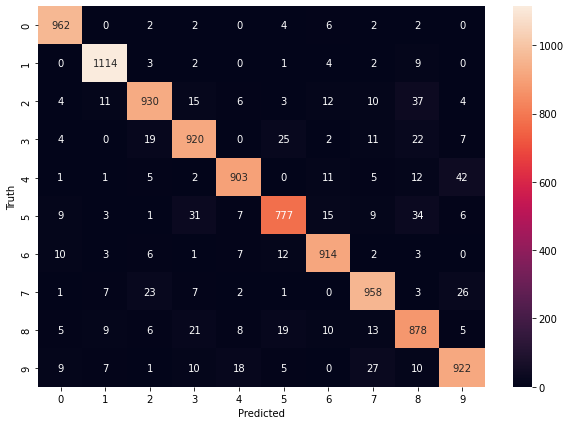

In [ ]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

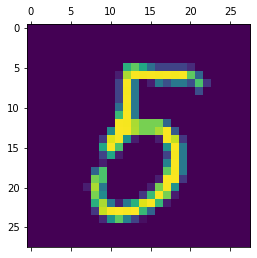

In [ ]:
plt.matshow(X_test[45])

In [ ]:
np.argmax(y_predicted[45])

5

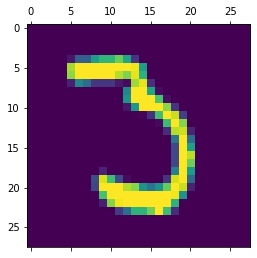

In [36]:
plt.matshow(X_test[158])

In [37]:
np.argmax(y_predicted[158])

3